In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('My Uber Drives.csv')

In [3]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
df.isna().sum()/len(df)*100

START_DATE*     0.000000
END_DATE*       0.086505
CATEGORY*       0.086505
START*          0.086505
STOP*           0.086505
MILES*          0.000000
PURPOSE*       43.512111
dtype: float64

In [7]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [9]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [10]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [11]:
df.columns=['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE']

In [12]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [13]:
df['PURPOSE']=df['PURPOSE'].fillna('Unknown')

In [14]:
df.dropna(inplace=True)

In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df.isna().sum()/len(df)*100

START_DATE    0.0
END_DATE      0.0
CATEGORY      0.0
START         0.0
STOP          0.0
MILES         0.0
PURPOSE       0.0
dtype: float64

# Feature Engineering

In [17]:
df.sample(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
360,5/6/2016 17:18,5/6/2016 17:44,Business,Morrisville,Cary,7.9,Customer Visit
1028,12/8/2016 14:19,12/8/2016 14:32,Business,Cary,Cary,3.4,Errand/Supplies
471,6/25/2016 11:53,6/25/2016 13:21,Business,Metairie,New Orleans,15.5,Meeting
132,2/19/2016 16:26,2/19/2016 16:45,Business,Unknown Location,Islamabad,3.5,Unknown
196,3/5/2016 14:39,3/5/2016 15:01,Business,Whitebridge,Wayne Ridge,7.8,Meal/Entertain
370,5/14/2016 23:01,5/14/2016 23:05,Business,Morrisville,Cary,3.1,Meal/Entertain
389,5/31/2016 13:54,5/31/2016 14:41,Business,Cary,Raleigh,14.9,Meeting
726,8/27/2016 14:01,8/27/2016 15:44,Business,Lahore,Unknown Location,86.6,Unknown
501,7/1/2016 9:34,7/1/2016 9:57,Business,Cary,Raleigh,13.3,Meeting
588,7/22/2016 18:33,7/22/2016 18:51,Business,Wayne Ridge,Whitebridge,8.0,Unknown


In [18]:
cat_col=df.select_dtypes(include='O').columns
cat_col

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE'], dtype='object')

In [19]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],format="%m/%d/%Y %H:%M")

In [20]:
df['END_DATE']=pd.to_datetime(df['END_DATE'],format="%m/%d/%Y %H:%M")

In [21]:
df['Month']=df['START_DATE'].apply(lambda time:time.month)

In [22]:
df['Hour']=df['START_DATE'].apply(lambda time:time.hour)

In [23]:
df['weekday']=df['START_DATE'].apply(lambda time:time.dayofweek)

In [24]:
dmap={0:"Mon",1:'Tues',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
df['weekday']=df['weekday'].map(dmap)

In [26]:
mmap={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [27]:
df['Month']=df['Month'].map(mmap)

In [28]:
df.sample(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,Hour,weekday
555,2016-07-16 19:42:00,2016-07-16 20:35:00,Personal,Boone,Banner Elk,23.8,Unknown,July,19,Sat
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Unknown,Sep,21,Tues
682,2016-08-19 17:12:00,2016-08-19 17:52:00,Business,Islamabad,Unknown Location,12.5,Unknown,Aug,17,Fri
1065,2016-12-19 14:18:00,2016-12-19 14:32:00,Business,Unknown Location,Unknown Location,5.3,Unknown,Dec,14,Mon
788,2016-10-06 17:23:00,2016-10-06 17:40:00,Business,R?walpindi,Unknown Location,112.6,Unknown,Oct,17,Thur
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Jan,1,Sat
604,2016-07-27 21:34:00,2016-07-27 21:57:00,Business,Morrisville,Raleigh,14.7,Unknown,July,21,Wed
806,2016-10-13 12:08:00,2016-10-13 12:14:00,Business,Islamabad,Islamabad,1.0,Unknown,Oct,12,Thur
819,2016-10-16 19:27:00,2016-10-16 19:33:00,Business,Whitebridge,Parkway,2.1,Meeting,Oct,19,Sun
543,2016-07-13 13:42:00,2016-07-13 13:54:00,Personal,Morrisville,Cary,4.4,Unknown,July,13,Wed


In [29]:
df['Duration']=df['END_DATE']-df['START_DATE']

In [30]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,Hour,weekday,Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,21,Fri,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Jan,1,Sat,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,20,Sat,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,17,Tues,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,14,Wed,0 days 01:07:00
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Dec,1,Sat,0 days 00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Dec,13,Sat,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Dec,15,Sat,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Dec,21,Sat,0 days 00:18:00


In [31]:
df['Duration']=df['Duration'].astype('str')

In [32]:
df['Duration']=df['Duration'].map(lambda x:x[7:15])

In [33]:
df['Duration']

0       00:06:00
1       00:12:00
2       00:13:00
3       00:14:00
4       01:07:00
          ...   
1150    00:07:00
1151    00:18:00
1152    00:35:00
1153    00:18:00
1154    01:43:00
Name: Duration, Length: 1155, dtype: object

In [34]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
Month                 object
Hour                   int64
weekday               object
Duration              object
dtype: object

In [35]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,Hour,weekday,Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,21,Fri,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Jan,1,Sat,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,20,Sat,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,17,Tues,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,14,Wed,01:07:00
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Dec,1,Sat,00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Dec,13,Sat,00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Dec,15,Sat,00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Dec,21,Sat,00:18:00


In [36]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
Month                 object
Hour                   int64
weekday               object
Duration              object
dtype: object

# 1)Find the maximum and minimum miles ride.

In [37]:
df[df['MILES']==df['MILES'].max()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,Hour,weekday,Duration
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,March,16,Fri,05:30:00


### The maximum mile ride taken is 310.3 Miles.

In [38]:
df[df['MILES']==df['MILES'].min()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,Hour,weekday,Duration
44,2016-01-26 17:27:00,2016-01-26 17:29:00,Business,Cary,Cary,0.5,Errand/Supplies,Jan,17,Tues,00:02:00
120,2016-02-17 16:38:00,2016-02-17 16:43:00,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies,Feb,16,Wed,00:05:00
420,2016-06-08 17:16:00,2016-06-08 17:18:00,Business,Soho,Tribeca,0.5,Errand/Supplies,June,17,Wed,00:02:00


### The minimum ride taken is 0.5 Miles.

# Q2)Find the maximum and minimum duration ride.

In [39]:
df[df['Duration']==df['Duration'].max()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,Hour,weekday,Duration
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Unknown,Sep,21,Tues,05:36:00


### The Maximum duration ride is 5 Hours and 36 Minutes.

In [40]:
df[df['Duration']==df['Duration'].min()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,Hour,weekday,Duration
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Unknown,Sep,17,Tues,00:00:00
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Unknown,Sep,7,Fri,00:00:00
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,Unknown,Oct,15,Sat,00:00:00
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,Unknown,Oct,13,Thur,00:00:00


### The Minimum duration ride is 0 Hours and 0 Minutes.

# Q3)Which day is the busiest day?

In [41]:
df['weekday'].value_counts()

Fri     206
Tues    176
Mon     174
Thur    154
Sat     150
Sun     148
Wed     147
Name: weekday, dtype: int64

<AxesSubplot:ylabel='weekday'>

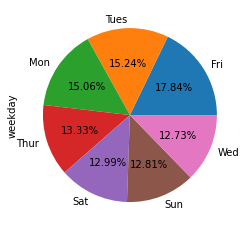

In [42]:
df['weekday'].value_counts().plot.pie(autopct='%1.2f%%')

### Friday is the most busiest day with 206 rides And Wednesday is the least busiest day with 147 rides.

# Q4) Find Rides Per month.

In [43]:
df['Month'].value_counts()

Dec      146
Aug      133
Nov      122
Feb      115
March    113
July     112
June     108
Oct      106
Jan       61
April     54
May       49
Sep       36
Name: Month, dtype: int64

The Rides Per Month are as follows:


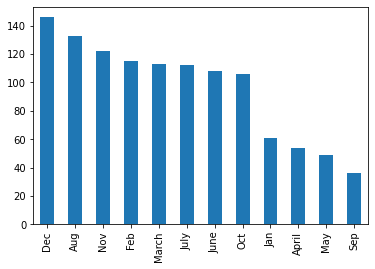

In [44]:
df['Month'].value_counts().plot.bar()
plt.show()

### The highest rides per month is in December with 146 rides and lowest ride per month is in September with 36 rides.

# Q5)Find Rides per Hour.

In [45]:
df['Hour'].value_counts()

15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    26
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: Hour, dtype: int64

### The most travelled hour is '15' in Afternoon with 98 rides and least travelled hour is '2' at Night with 2 rides.  

# Q6)Find Purpose for most number of rides.

In [46]:
df['PURPOSE'].value_counts()

Unknown            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

### The most purposes of rides are for Meeting, Meal or Entertainment or Supplies. 

# Q7)What is the rides per category for purpose.

In [47]:
df.groupby('CATEGORY')['PURPOSE'].value_counts()

CATEGORY  PURPOSE        
Business  Unknown            431
          Meeting            187
          Meal/Entertain     160
          Errand/Supplies    128
          Customer Visit     101
          Temporary Site      50
          Between Offices     18
          Airport/Travel       3
Personal  Unknown             71
          Moving               4
          Charity ($)          1
          Commute              1
Name: PURPOSE, dtype: int64

### The Rides for Business Category for Meeting purpose is 187, For Meal/Entertainment purpose is 160 , For Errand/Supplies purpose is 128, For Customer Visit is 101,For Temporary Site is 50,For Between offices is 18 And for Airport Travel is 3. The Rides for Personal Category for Moving is 4 and for Charity and commute is 1 for each.

# Q8)5 highest Number of Pickup and drop Points.

In [ ]:
df['START'].value_counts()[0:6]

In [ ]:
df['STOP'].value_counts()[0:6]

### The Top 5 Pickup and Drop Point are Cary, Morrisville ,Whitebridge, Islamabad, Durham and Lahore.